# Yahoo Finance Web Scrapper

## Dataset
This dataset was downloaded from Kaggle. This version of the dataset was downloaded in early 2017, and contains serveral images that will cause erros when using the cv2.imread function.

## Approach/Process
1. Import Libraries
2. Import data
3. Data prepartion
4. Training/Validation Split
5. Build/Fit the Model
6. Testing/Results

## Results
When tested on a picture of my own dog the model performed well, however, when tested on a personal picture of cats the model did not correctly classify the image.

In [1]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url_stats = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
url_profile = 'https://finance.yahoo.com/quote/{}/profile?p={}'
url_financials = 'https://finance.yahoo.com/quote/{}/financials?p={}'

In [3]:
stock = ['XOM','CVX','RDS-B','TOT','BP','COP','EOG','PXD','BKR','OXY']
df = []

In [4]:
for x in range(len(stock)):
    response = requests.get(url_profile.format(stock[x], stock[x]))
    soup = BeautifulSoup(response.text, 'html.parser')
    pattern = re.compile(r'\s--\sData\s--\s')
    script_data = soup.find('script', text = pattern).contents[0]
    start = script_data.find('context')-2
    json_data = json.loads(script_data[start:-12])
    a = json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['summaryDetail']['marketCap']['longFmt']
    a = a.replace(',','')
    df.append(int(a))

In [5]:
# # Market Cap, full number, string fmt

type(json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['summaryDetail']['marketCap']['longFmt'])

str

In [6]:
df

[236357435392,
 202029875200,
 148223082496,
 123090386944,
 82696740864,
 71623385088,
 42331914240,
 34397237248,
 22494713856,
 24848732160]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

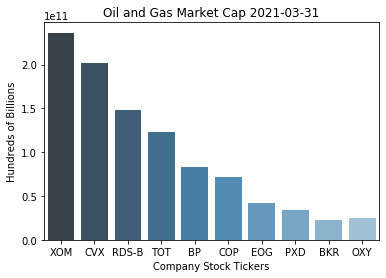

In [15]:
ax = sns.barplot(x=stock,y=df, palette='Blues_d')
ax.set_title('Oil and Gas Market Cap ' + str(dt.date.today()))
ax.set_ylabel('Hundreds of Billions')
ax.set_xlabel('Company Stock Tickers')
plt.savefig(str(dt.date.today()) + '.png')